In [1]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 7.7MB/s 
     |████████████████████████████████| 3.2MB 12.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 1.1MB 37.5MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 296kB 44.4MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=1f3c43fc4ff5161ccacd90ee59b54ce8be1527404cc5eb778d586dc159dff914
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=fab7e388fa62bad693c2c21cc5b61cbd1ed5d4a0c69cc50b38a54f85d29a282e
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing i

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter6_Decision_Tree'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter6_Decision_Tree


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus
import pandas as pd
import numpy as np

In [5]:
iris = pd.read_excel("Iris.xls")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
X = iris[["petalwidth", "petallength", "sepalwidth", "sepallength"]]
y = iris["iris"]

In [22]:
X.head()

,petalwidth,petallength,sepalwidth,sepallength
0,0.2,1.4,3.5,5.1
1,0.2,1.4,3.0,4.9
2,0.2,1.3,3.2,4.7
3,0.2,1.5,3.1,4.6
4,0.2,1.4,3.6,5.0


In [23]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: iris, Length: 150, dtype: object

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Decision Tree Classifier


In [25]:
clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)

In [26]:
model.score(X_test, y_test)

0.9210526315789473

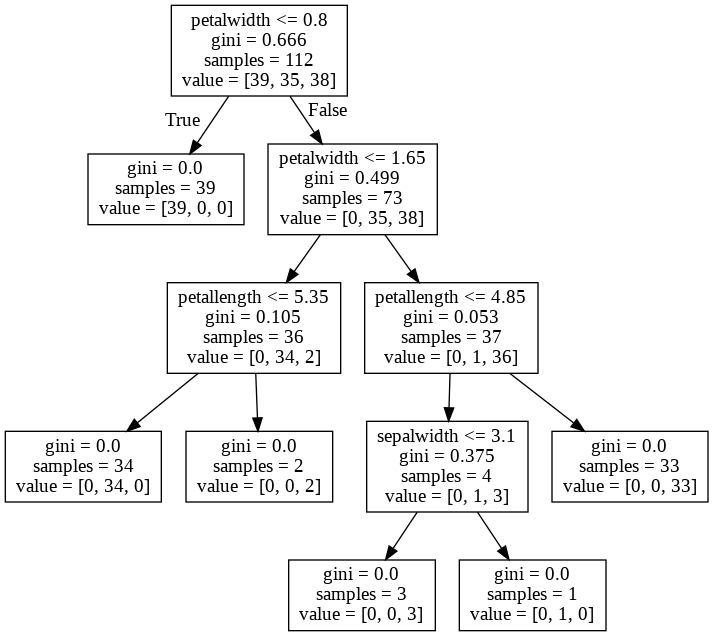

In [27]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns
                                )
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [29]:
graph.write_pdf("iris_1510.pdf")
graph.write_png("iris_1510.png")

True

In [30]:
with open("irish_1510.txt", "w") as f:
  f = tree.export_graphviz(clf, out_file=f,
                           feature_names = X_test.columns)
  print("Export success")

Export success


In [34]:
X_new = np.array([[4.7, 3.2, 1.3, 0.2],
                  [6.6, 3. , 4.4, 1.4],
                  [5.9, 3. , 5.1, 1.8]])

In [35]:
yhat_new = model.predict(X_new)
yhat_new

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)